## ATM/MPO 651 Introduction to Atmospheric Dynamics
**Soultion of ODE solved by scipy**<br>
This notebook demonstrates a useful function "odeint" in scipy which allows us to solve ODEs in an easy way. This function directly returns the solution given coefficients and initial conditions. See more details from [the reference](http://sam-dolan.staff.shef.ac.uk/mas212/notebooks/ODE_Example.html)<br>

In [1]:
import numpy as np
from scipy.integrate import odeint # import ode solver
import matplotlib.pyplot as plt

### Two examples in HW0
- #22

In [2]:
ts = np.linspace(0,2,100) # range of t 

#22 f'(t) = -2*f(t), slope negatively propotional to its value
f0 = 1  # the initial condition at the origin f(0)=1
fs_22a = np.exp(-2*abs(ts))

def df_dt(f,t): 
    # df_dt is the first derivative of f and the independent variable is t. 
    # This function returns a relationship showing that df/dt = -2f.
    return -2*f

fs_22 = odeint(df_dt, f0, ts)
fs_22 = np.array(fs_22).flatten() # --> derived solution for Q22

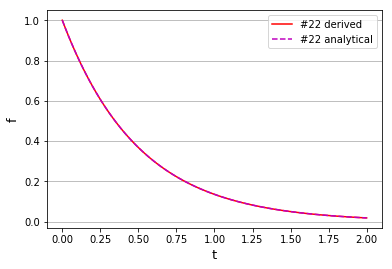

In [3]:
plt.plot(ts, fs_22,'r') 
plt.plot(ts, fs_22a,'--m')
plt.grid(axis='y')
plt.xlabel("t",fontsize=13)
plt.ylabel("f",fontsize=13)
plt.legend(['#22 derived','#22 analytical'])
plt.show()

- #24

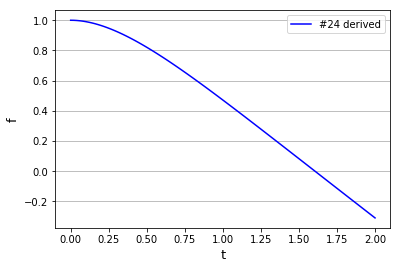

In [4]:
#24 f''(t) = -2*exp(-2*t)*f(t)
def d2f_dt(U,t):
    # Here U is a vector such that f=U[0] and f'=U[1]. 
    return [U[1], -2*np.exp(-2*t)*U[0]]
U0 = [1, 0] # initial conditions for f(0)=1 and f'(0)=0
Fs = odeint(d2f_dt, U0, ts)
fs_24 = Fs[:,0]                # --> analytical solution for Q24

# Plot the numerical solution
plt.plot(ts, fs_24,'b')
plt.grid(axis='y')
plt.xlabel("t",fontsize=13)
plt.ylabel("f",fontsize=13)
plt.legend(['#24 derived'])
plt.show()

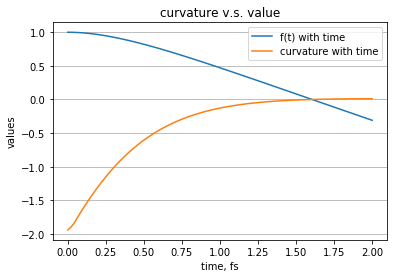

In [5]:
# double check for #24
curve = np.gradient(np.gradient(fs_24,ts,edge_order=2),ts,edge_order=2) # secondary derivative of f, curvature
plt.plot(ts,fs_24)
plt.plot(ts,curve)
plt.grid(axis='y')
plt.title('curvature v.s. value')
plt.ylabel('values');plt.xlabel('time, fs')
plt.legend(['f(t) with time','curvature with time'])
plt.show()

**So the curvature is negatively proportional to its value, and the proportionality decreases with time.**